<a href="https://colab.research.google.com/github/karaogluhh/PythonNotebooks/blob/main/003.%20Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scipy

In [383]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import jn, yn, jn_zeros, yn_zeros


## Special Functions


In [384]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel function of second kind
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


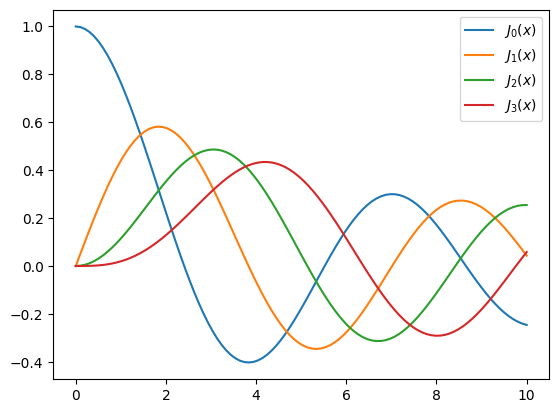

In [385]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [386]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

## Integration
Numerical integration ...

In [390]:
from scipy.integrate import quad, dblquad, tplquad

In [391]:
# define a simple function for the integrand
def f(x):
    return x

In [392]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print("integral value =", val, ", absolute error =", abserr)

integral value = 0.5 , absolute error = 5.551115123125783e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [394]:
def integrand(x, n):
    """
    Bessel function of first kind and order n.
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print(val, abserr)

0.7366751370811073 9.389126882496403e-13


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand:

In [398]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.inf, np.inf)

print("numerical  =", val, abserr)

analytical = np.sqrt(np.pi)
print("analytical =", analytical)

numerical  = 1.7724538509055159 1.4202636780944923e-08
analytical = 1.7724538509055159


Higher-dimensional integration works in the same way:


In [400]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(val, abserr)

0.7853981633974476 1.3753098510194181e-08


## Ordinary Differential Equations (ODEs)


In [402]:
from scipy.integrate import odeint, ode
# THIS SECTION WILL BE LATER EXAMINED

## Fourier Transform


In [403]:
from numpy.fft import fftfreq
from scipy.fftpack import *
# THIS SECTION WILL BE LATER EXAMINED

## Linear Algebra

In [407]:
from scipy.linalg import *

In [413]:
A = np.array([[1,2,7], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

In [415]:
x = solve(A,b)
x

array([-0.33333333,  0.66666667, -0.        ])

In [418]:
np.dot(A, x) - b # check the result

array([ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00])

In [420]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

X = solve(A, B)
X


array([[ 2.29393076, -0.99320369, -0.43674973],
       [-6.22563191, -7.1933796 , -9.97930135],
       [ 6.00489283,  8.24184072, 11.06966389]])

In [421]:
norm(np.dot(A, X) - B)


1.823099580466593e-15

In [424]:
evals = eigvals(A)
evals

array([ 1.87646742+0.j,  0.24224767+0.j, -0.04406923+0.j])

In [426]:
evals, evecs = eig(A)
evals, evecs

(array([ 1.87646742+0.j,  0.24224767+0.j, -0.04406923+0.j]),
 array([[-0.57253388, -0.80712386, -0.01773611],
        [-0.48865208,  0.54504993, -0.69587792],
        [-0.65834953, -0.22687366,  0.71794105]]))

In [427]:
n = 1

norm(np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n])


3.66121187763494e-16

In [428]:
inv(A)

array([[  3.24248341,  -1.75112021,  -1.05662785],
       [-11.54359482,  -6.58753853,  15.32396343],
       [ 10.68227959,   7.98754787, -14.68559359]])

In [429]:
det(A)

-0.020032542103646026

In [431]:
norm(A, ord=2), norm(A, ord=np.inf)

(1.974103069680997, 2.1638098589661814)

## Optimization

In [432]:
from scipy import optimize

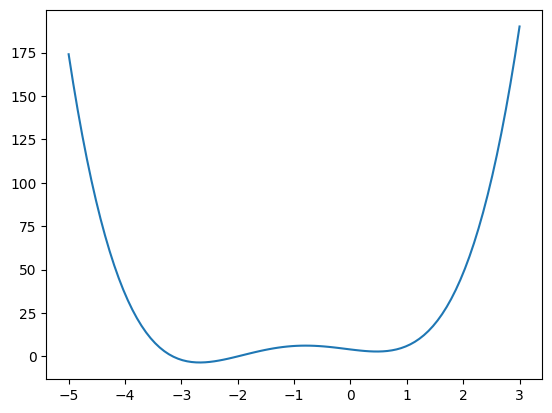

In [434]:
def f(x):
  return 4*x**3 + (x-2)**2 + x**4

fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

In [436]:
x_min = optimize.fmin_bfgs(f, -2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.6729815])

In [437]:
optimize.fmin_bfgs(f, 0.5)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

In [438]:
optimize.brent(f)

0.46961743402759754

In [439]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Finding a solution to a function


In [ ]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return tan(2*pi*omega) - omega_c/omega

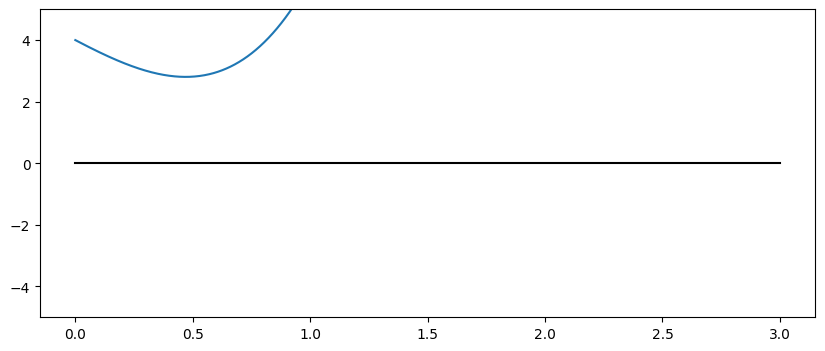

In [440]:
fig, ax  = plt.subplots(figsize=(10,4))
x = np.linspace(0, 3, 1000)
y = f(x)
mask = np.where(np.abs(y) > 50)
x[mask] = y[mask] = np.NaN # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [441]:
optimize.fsolve(f, 0.1)

array([0.46964549])

In [442]:
optimize.fsolve(f, 0.6)

array([0.46350011])

In [443]:
optimize.fsolve(f, 1.1)

array([0.46966502])

## Interpolation

In [463]:
# THIS SECTION WILL BE LATER EXAMINED

## Statistics

In [465]:
from scipy import stats

In [466]:
# create a (discrete) random variable with Poissonian distribution
X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

(array([ 27., 102., 188., 221., 183., 128.,  87.,  33.,  20.,  11.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

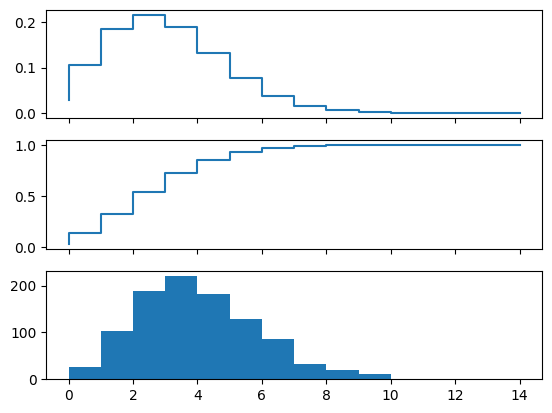

In [467]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the cumulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000))

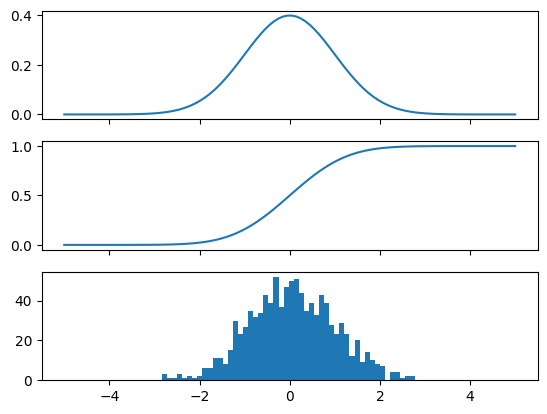

In [470]:
# create a (continuous) random variable with normal distribution
Y = stats.norm()

x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the cumulative distribution function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [472]:
X.mean(), X.std(), X.var()

(3.5, 1.8708286933869707, 3.5)

In [473]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)